### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-13,411406,4049417,607784,535838,235277,128747,127808,142102,111597,91295,81033,113839,86207,4848,194606
2021-07-14,411989,4058112,608115,537394,235507,128797,127831,142877,111609,91326,81043,114337,86391,4848,194752
2021-07-15,412531,4066561,608398,538942,235740,128864,127840,143657,111619,91346,81084,114833,86592,4848,194845
2021-07-16,413091,4075288,608815,540398,236015,128913,127851,144446,111641,91367,81096,115333,86791,4848,194935
2021-07-17,413609,4082335,608884,541266,236240,128960,127864,145222,111657,91369,81096,115831,86966,4848,195047


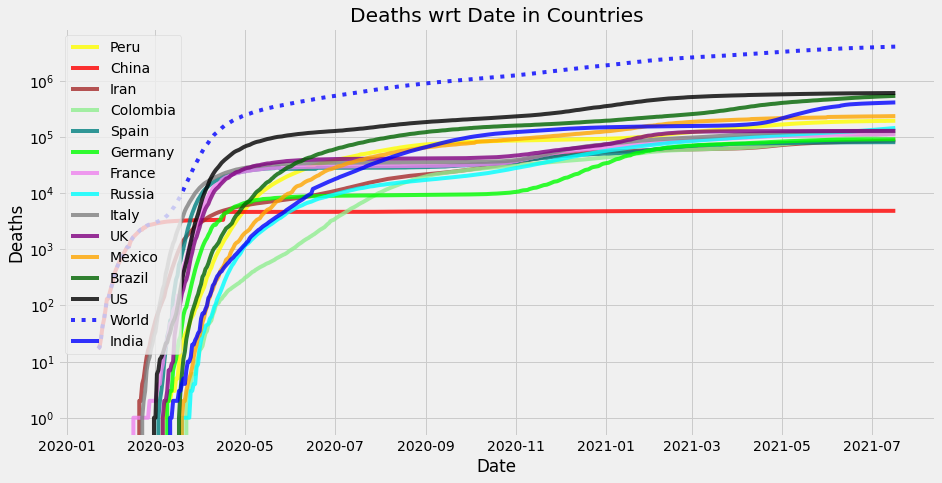

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-13,38865,520038,26424,45022,11137,36500,1530,24211,6958,1027,43960,17532,22750,25,2010
2021-07-14,41733,540104,31845,57736,12116,42183,2153,23331,1450,1623,26390,17230,23371,31,2316
2021-07-15,38949,569347,28412,52789,12821,48641,2473,24793,11058,1444,27688,18070,23655,36,2260
2021-07-16,38079,599949,79310,45591,12420,51949,2895,25188,10995,1565,31060,17893,21885,31,2032
2021-07-17,41157,472593,12960,34339,12631,54183,3118,24590,10949,1309,0,19925,15139,33,1950


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-13,58222,422186,17922,52066,5506,23403,1350,20774,3266,1233,12223,24846,14347,25,2677
2021-07-14,57123,430047,18850,52444,5947,24655,1403,20945,3145,1259,13167,24339,14948,26,2653
2021-07-15,55911,439334,19487,52467,6405,26254,1475,21201,3672,1271,14135,23921,15529,26,2627
2021-07-16,54722,450041,23476,52008,6806,27967,1569,21467,4160,1291,15264,23519,15952,26,2587
2021-07-17,53818,451545,22774,50830,7195,29715,1673,21675,4613,1292,14246,23279,15898,27,2544


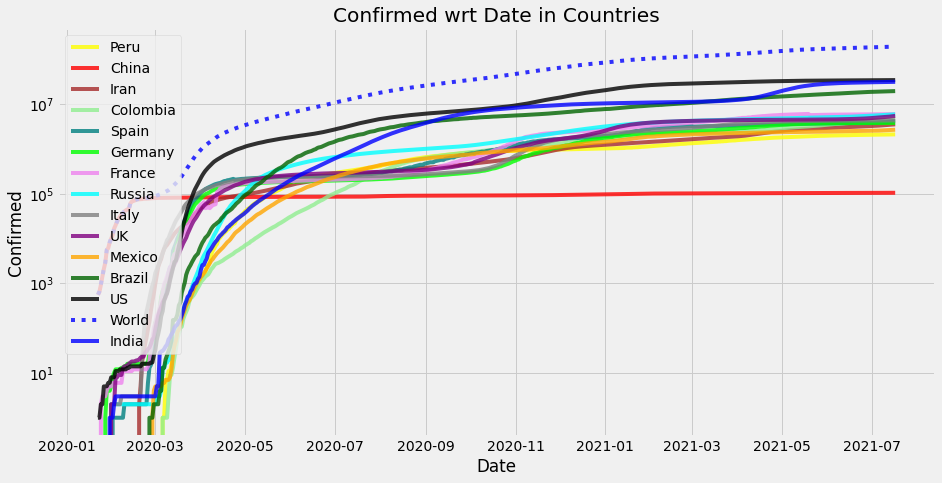

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-13,622,8322,385,1605,219,50,20,767,54,27,13,504,166,0,118
2021-07-14,583,8695,331,1556,230,50,23,775,12,31,10,498,184,0,146
2021-07-15,542,8449,283,1548,233,67,9,780,10,20,41,496,201,0,93
2021-07-16,560,8727,417,1456,275,49,11,789,22,21,12,500,199,0,90
2021-07-17,518,7047,69,868,225,47,13,776,16,2,0,498,175,0,112


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-07-13,1062.54,8013.55,250.46,1354.71,174.45,25.83,20.32,686.04,29.41,31.03,13.75,585.01,151.90,0.06,185.78
2021-07-14,1002.60,8098.73,260.53,1379.87,181.39,28.85,20.66,697.16,27.23,31.02,13.28,574.13,155.91,0.05,180.81
2021-07-15,945.02,8142.51,263.34,1400.89,187.84,33.62,19.20,707.52,25.08,29.65,16.75,564.36,161.55,0.05,169.83
2021-07-16,896.89,8215.57,282.54,1407.78,198.74,35.54,18.18,717.70,24.69,28.56,16.15,556.32,166.23,0.04,159.85
2021-07-17,849.53,8069.50,255.85,1340.31,202.02,36.97,17.53,724.99,23.61,25.24,14.13,549.03,167.33,0.04,153.87


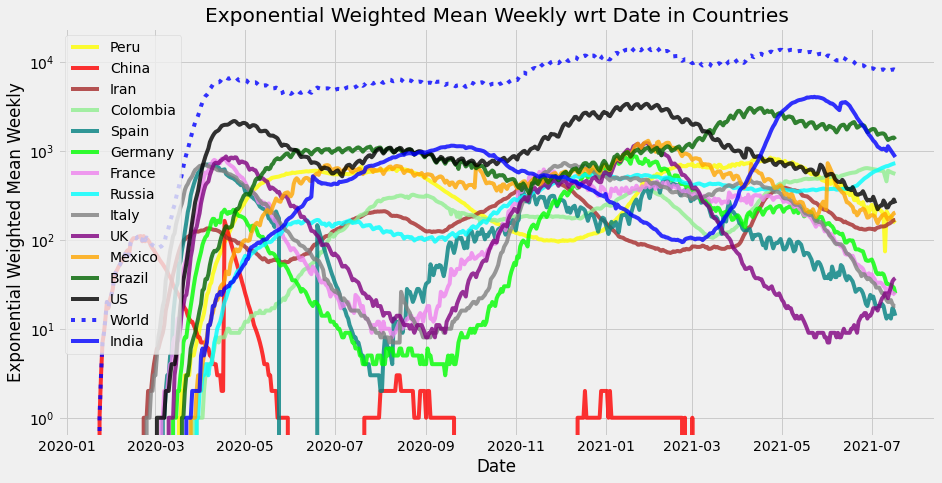

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

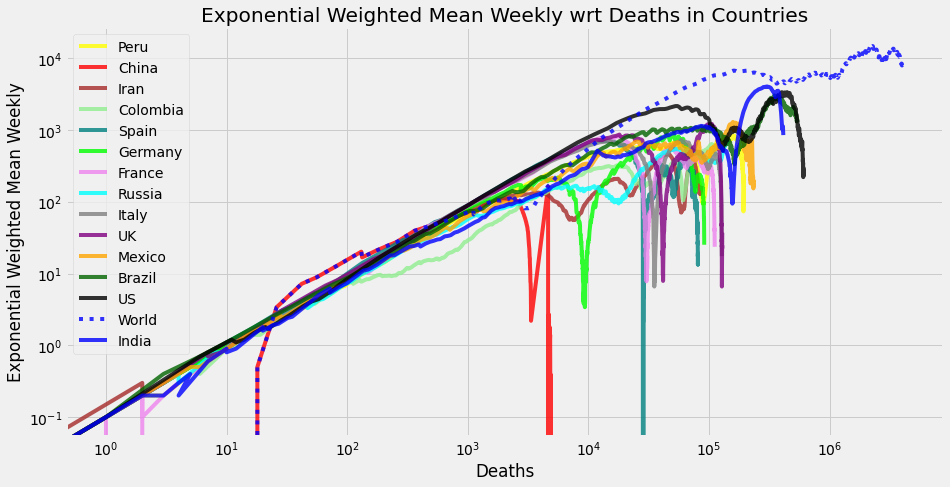

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

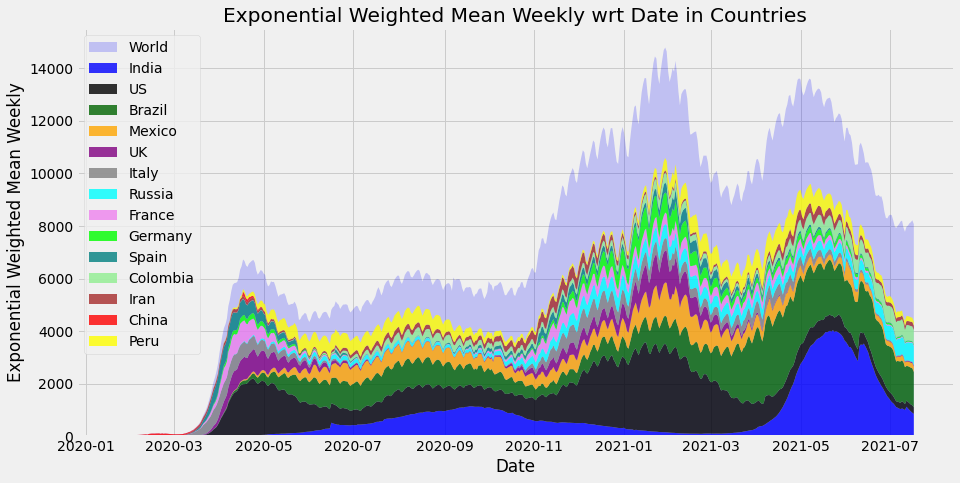

In [20]:
stackplotter(AVG, name)

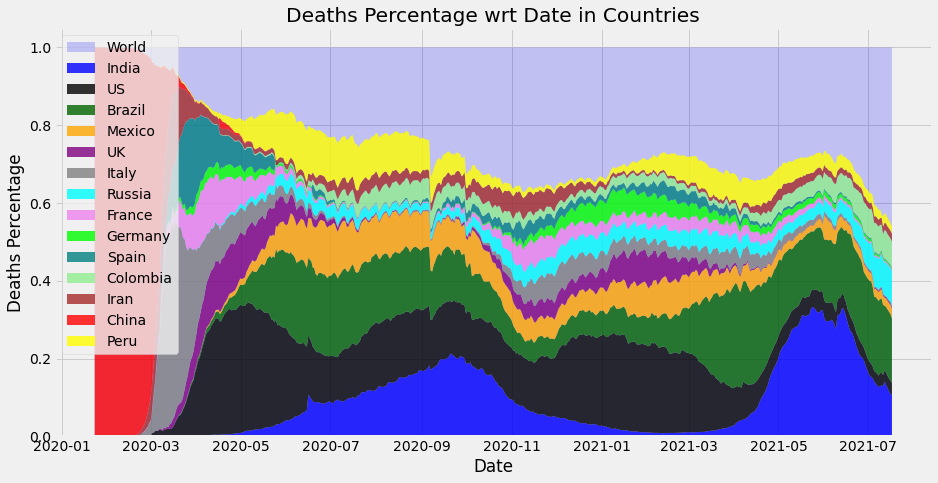

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

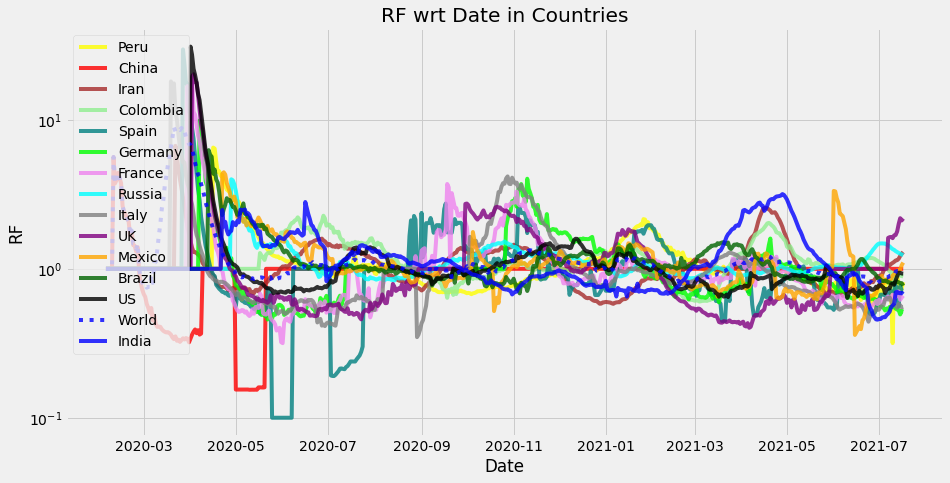

In [23]:
plotter(Reproductivity, 'RF')

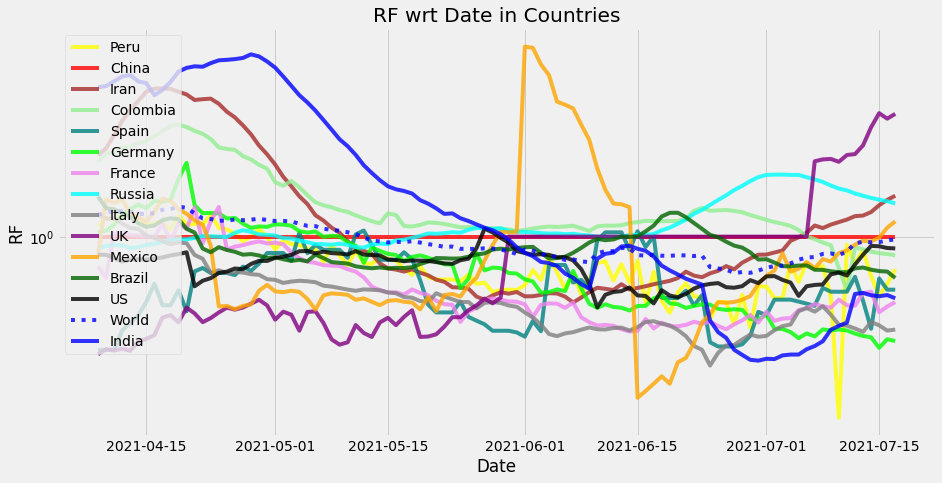

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

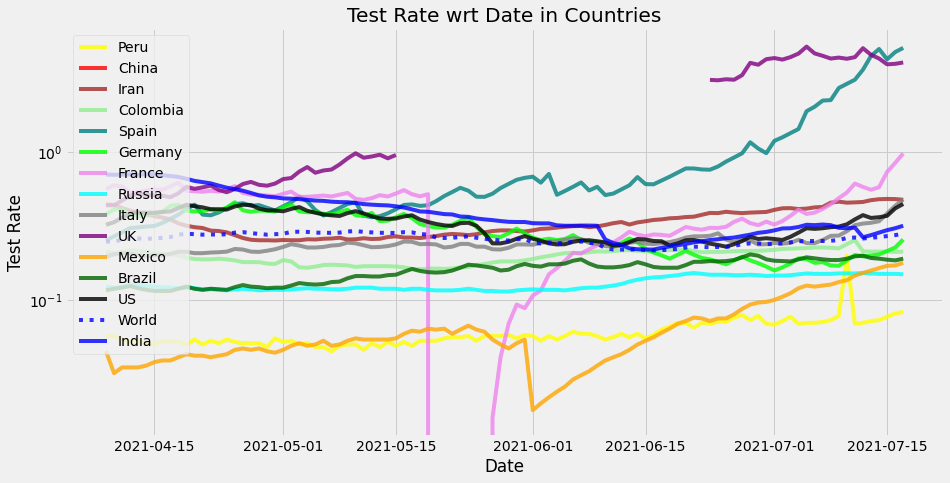

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

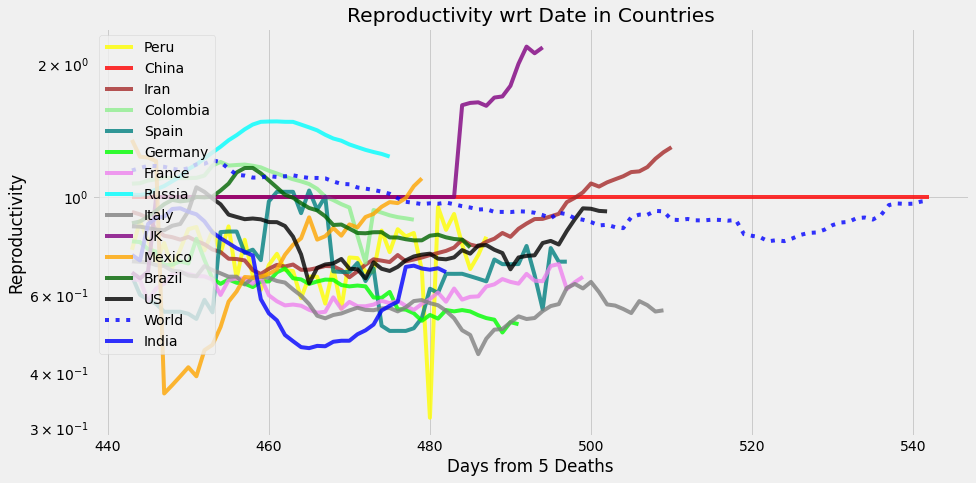

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

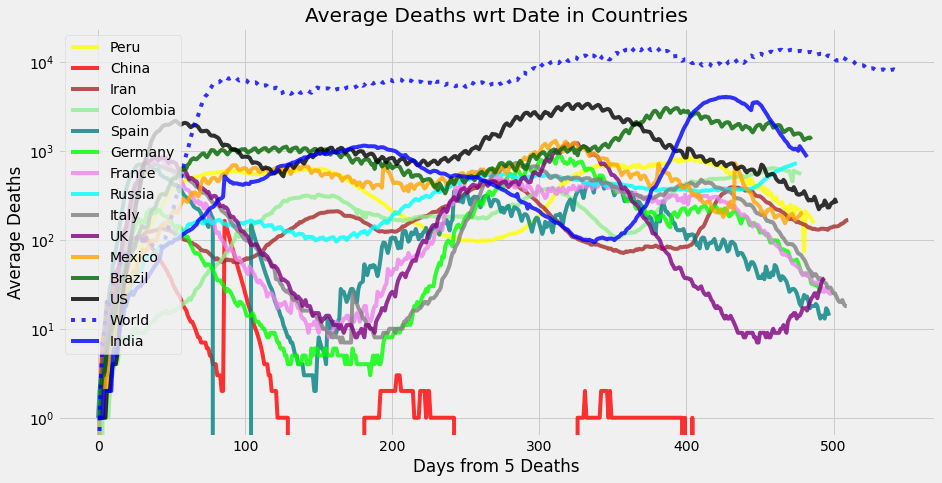

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

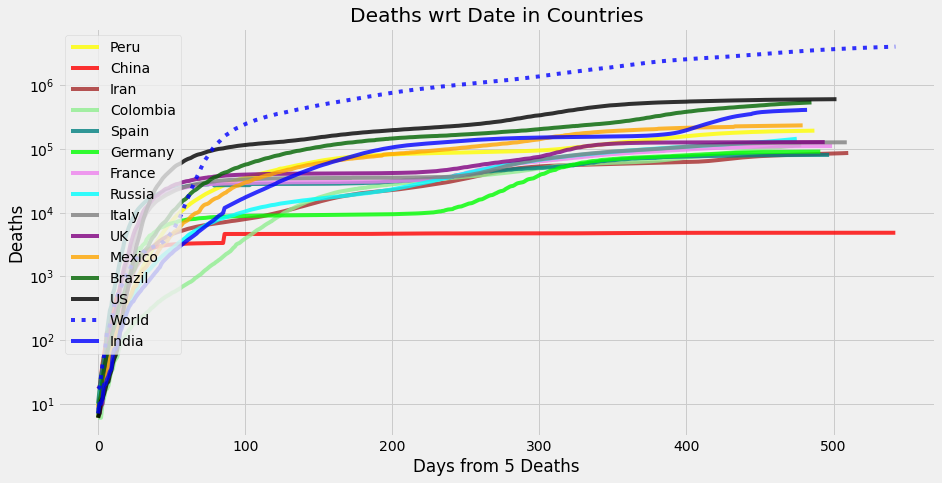

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4082335,7047,8177.29,8069.50,0.9823,189997805,0.280,451545,816.47
US,608884,69,250.29,255.85,0.9280,34067912,0.445,22774,121.78
Brazil,541266,868,1196.14,1340.31,0.7695,19342448,0.190,50830,108.25
India,413609,518,795.57,849.53,0.6764,31106065,0.317,53818,82.72
Mexico,236240,225,190.43,202.02,1.1018,2654699,0.178,7195,47.25
Peru,195047,112,259.57,153.87,0.8134,2092125,0.083,2544,39.01
Russia,145222,776,760.86,724.99,1.2343,5860113,0.149,21675,29.04
UK,128960,47,42.14,36.97,2.1786,5407428,4.019,29715,25.79
Italy,127864,13,13.71,17.53,0.5546,4284332,0.477,1673,25.57


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4082335,7047,8177.29,8069.50,0.9823,189997805,0.280,451545,816.47
Brazil,541266,868,1196.14,1340.31,0.7695,19342448,0.190,50830,108.25
Indonesia,72489,1092,1004.57,876.60,2.1453,2832755,0.189,33160,14.50
India,413609,518,795.57,849.53,0.6764,31106065,0.317,53818,82.72
Russia,145222,776,760.86,724.99,1.2343,5860113,0.149,21675,29.04
Colombia,115831,498,585.71,549.03,0.8888,4621260,0.212,23279,23.17
Argentina,101434,276,419.00,423.82,0.8742,4749443,0.213,18015,20.29
South Africa,66676,291,362.57,346.46,1.6070,2283880,0.225,15585,13.34
Peru,195047,112,259.57,153.87,0.8134,2092125,0.083,2544,39.01


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4082335


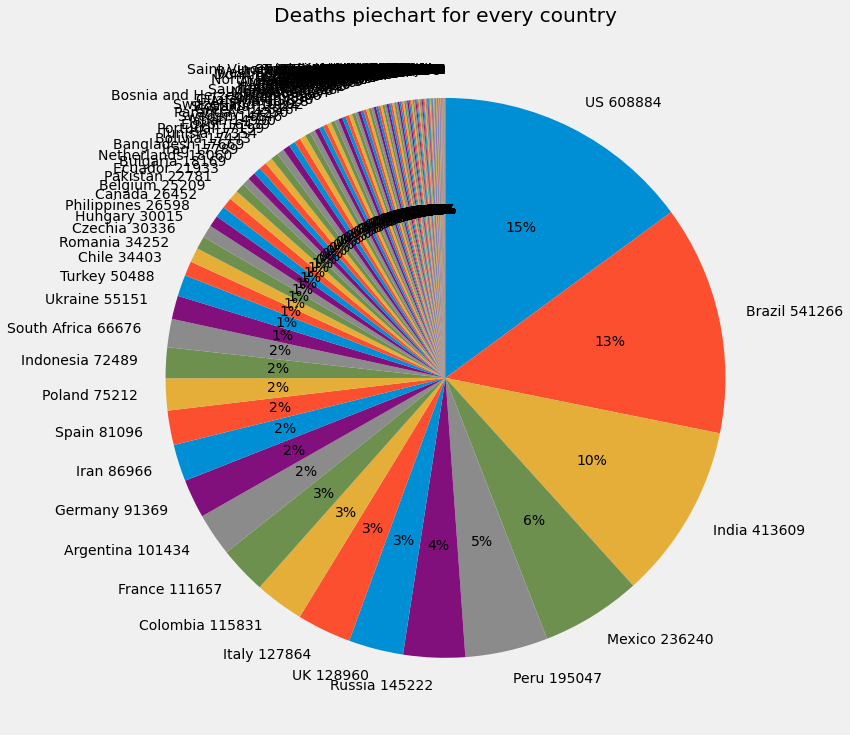

In [35]:
piechart('Deaths')

World total:  8177


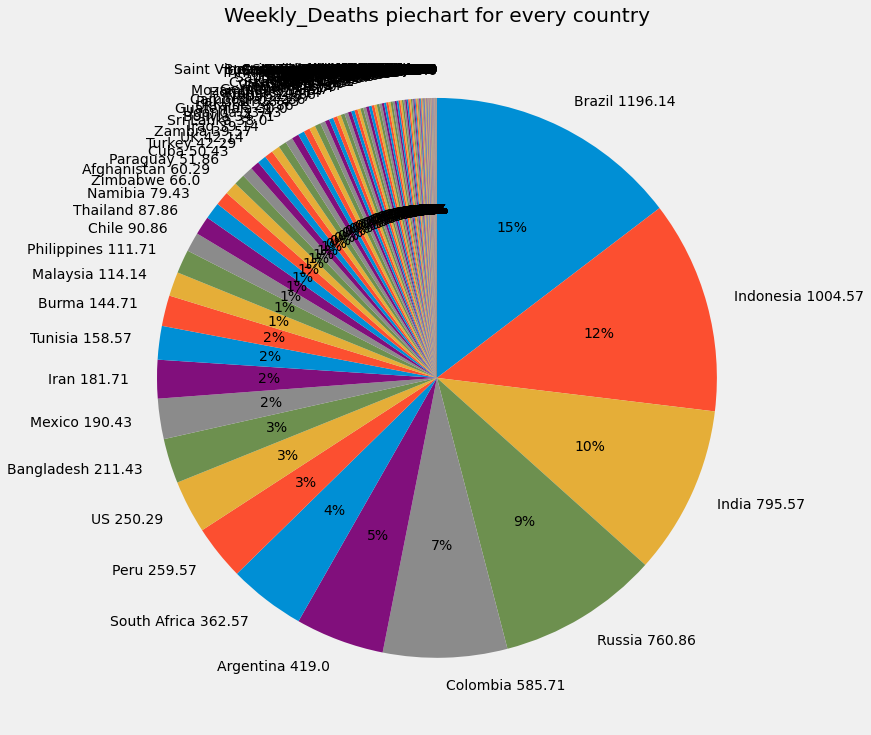

In [36]:
piechart('Weekly_Deaths')

World total:  7047


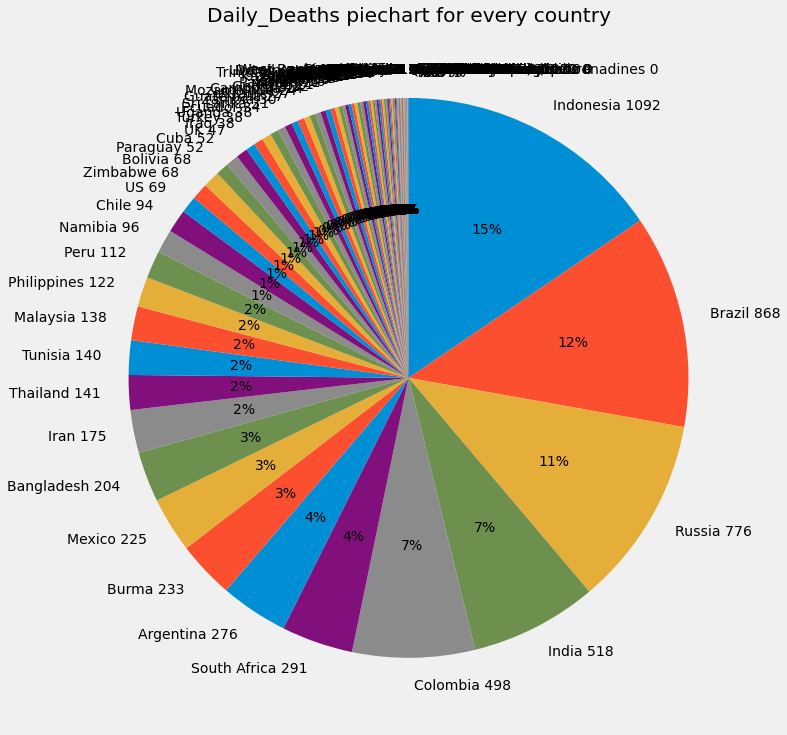

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-07-18


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

816467000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 9717f0c] `date` update
 1 file changed, 603 insertions(+), 22 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   84a64a5..9717f0c  master -> master
